<h1>Problem Set 7</h1> 
<h3><center>Quantitative Macro</center></h3>



<center>Pau Belda-i-Tortosa</center> |


<center>November 2018</center>

<h3>Question 2: Heterogenous agents with both idiosyncratic and aggregate risk.</h3>

The recursive HH problem is the following:

(1) $V(a,e,\Psi,z) = \underset{\{c, a',n\}}{\max{}} log(c) - \Gamma \frac{n^{1+\gamma}}{1+\gamma} + \beta \mathop{\mathbb{E}} V(a',e',\Psi',z')$

s.t.

(2)  $c + a' = w(\Psi,z)ne + (1+r(\Psi,z))a$

<br/>

The technology is given by a **Cobb-Douglas** aggregate production function:

(3) $y = z_s K ^{\alpha} N^{(1-\alpha)}$

<br/>

Then, from (3) we can recover factor prices: 

(3.1) $w(K,z_s)= (1-\alpha)z_s \big(\frac{K}{N}\big)^\alpha$

(3.2) $r(K,z_s) = \alpha z_s \big(\frac{N}{K}\big)^{1-\alpha}$

<br/>

**Description of the state vector**

a: idiosyncratic level of wealth.

e: employment situation = {high, low}

z: aggregate productivity. 

$\Psi(a,e)$: distribution of wealth and employment.

<br/>

Notice that the aggregate capital is determined by the distribution of wealth and employment $K = f(\Psi(a,e))$. Then, prices (w,r) are a function of the distribution. That is why the whole distribution, and not only the aggregate capital, is one of the aggregate state variables. 

<br/>

**Expectation computation**

(4) $\mathop{\mathbb{E}} V(a',e',\Psi',z') =\pi_{0l|ez}V(a',0,\Psi',l) + \pi_{0h|ez}V(a',0,\Psi',h)+ \pi_{1l|ez}V(a',1,\Psi',l) + \pi_{1h|ez}V(a',0,\Psi',h)$

<br/>

**Aggregate Law of Motion**

(5) $\Psi(\bar{a},\bar{e})=\underset{e'} \sum \pi_{\bar{e'}|e} \underset{\bar{a}=a'(e,a)} \sum \Psi(a,e)$

<br/>

### Krusell & Smith simplification
A way of simplifying the problem is to replace the whole distribution by just the aggregate capital, which is the first moment of the assets distribution. This is the trick K&S (1998) raised. Doing so, we end up with the following program:

(6) $V(a,e,K,z) = \underset{\{a',n\}}{\max{}} log(w(K,z)ne + (1+r(K,z))a -a') - \Gamma \frac{n^{1+\gamma}}{1+\gamma} + \beta \mathop{\mathbb{E}} V(a',e',K',z')$


Where 

(7) $K'=H(K,z)= exp(\beta_{0h} + \beta_{1h}*log(K))P + exp(\beta_{0l} + \beta_{1l}*log(K))(1-P)$


where:
- $P=1$ if $z_t=z_h$, 0 otherwise. 
- $\beta_{0h}$=0.1839
- $\beta_{0l}$=0.3217
- $\beta_{1h}$=0.9375
- $\beta_{1l}$=0.8855

(remember that the values of $\beta$ come from PS6). 

Finally, remember that $(w/r)=f(K/N,z)$. As a consequence, we need a mapping from (K,z) to N. This function is given by G:

(8) $ N(K,z) = (1-P)N_{z_l} + PN_{z_h}$


where $N_{z_s}$ is the aggregate shock-dependent employment.

<br/>

**Consistency conditions**

(9) $K'= H(K,z)= \underset {a,e}\sum a'(a,e)$

(10) $N'=G(K,z)=\underset {a,e}\sum n(a,e)$

<br/>

### Solution of the Household problem

**ALGORITHM**

1) Discretize the state space. 

2) Get the utility matrix:
   - Get the consumption for all possible combinations of K, L(z), z, e, k, k':     C(k,k',e,z,K). Note that prices are functions of (K,z). 
   - Get the utility consumption matrix: log(C).
   - Get the disutility labor matrix uL(k,k',e,z,K). 

3) Law of Motion for aggregate capital, which is parametrized form for expectations. Take beta's from previous PS estimation. 

4) VFI. We reduce the dimensionality problem by getting 4 value functions V(k,K,e,z), one for each combination of idiosyncratic-aggregate shock. 

5) Recover policy functions. We will end up with 4 assets functions: $a'(a,0,h), a'(a,0,l), a'(a,1,h), a'(a,1,l)$. Note that we use $H(K,z)$ to run the VFI. 

In [1]:
#Import packages
import matplotlib.pyplot as plt
from sympy import *
from sympy.solvers.solveset import linsolve
import itertools as it
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from scipy.optimize import *
from numpy import *
import numpy as np


#STEP 0: Parameters, state space and Transition Matrix. 
#Parameters
α=0.36
Γ=1
γ=5
β=0.99

#State space
e=[0,1]
k0=np.arange(0,5,0.2)
k1=np.arange(5.3,50,0.6)
k=np.concatenate((k0,k1))
L = [0.91, 0.93]
z=[0.95, 1.05]
K=np.arange(16,18.5,0.5)

#Transition matrix
π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44 = symbols ('π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44')
Π_1=linsolve([π_11 + π_12 + π_13 + π_14 -1, 
          π_21 + π_22 + π_23 + π_24 -1, 
          π_31 + π_32 + π_33 + π_34 -1, 
          π_41 + π_42 + π_43 + π_44 -1,
          π_21 + π_22 - 7/8,
          π_23 + π_24 - 1/8,
          π_43 + π_44 - 7/8,
          π_41 + π_42 - 1/8,
          π_33 + π_34 - 7/8,
          π_11 + π_12 - 7/8,
          π_31 + π_32 - 1/8,  
          π_13 + π_14 - 1/8,
          (0.04/(1/8))*π_31 + (0.96/(1/8))*π_41 - 0.1, 
          (0.04/(7/8))*π_33 + (0.96/(7/8))*π_43 - 0.04,
          (0.1/(7/8))*π_11 + (0.9/(7/8))*π_21 - 0.1,
          (0.1/(1/8))*π_13 + (0.9/(1/8))*π_23 - 0.1,
          π_31 - (1.25/7)*π_11,
          π_13 - (0.75/7)*π_33,
          π_43-0.005,
          π_21-0.02],
          (π_11, π_12, π_13, π_14, π_21, π_22, π_23, π_24, π_31, π_32, π_33, π_34, π_41, π_42, π_43, π_44))


Π_1= np.asarray(list(Π_1))
Π_1= np.reshape(Π_1, (4,4))



#STEP 2: Utility Matrix
#Consumption Matrix using a non-linear solver
C=np.empty((100,100,2,2,5))
for i,I,j,m,t in it.product(range(100), range(100),range(2),range(2),range(5)):
    def Implicit(x):
        c=x[0]
        F=empty((1))
        F[0] = pow((1-α)*z[m]*pow((K[t]/L[m]),α)*e[j], (1+γ/γ))*pow(Γ*c, -1/γ) + (1+ (α*z[m]*pow((L[m]/K[t]),(1-α))))*k[i] - k[I] -c
        return F

    C[i,I,j,m,t]=fsolve(Implicit,1)
    
#Utility from consumption 
logC= np.log(C)
logC[np.isnan(logC)]=0

#Disutility of labor
#Wages
w=np.empty((2,5))
r=np.empty((2,5))
for m,t in it.product(range(2),range(5)):
    w[m,t]=(1-α)*z[m]*pow((K[t]/L[m]),α)
    r[m,t]=α*z[m]*pow((L[m]/K[t]),(1-α))

#Disutility from labour
U_L=np.empty((100,100,2,2,5))
for m,t in it.product(range(2),range(5)):
    U_L[:,:,:,m,t] = (Γ/(1+γ))*pow((w[m,t]/Γ*C[:,:,:,m,t]), (1+γ)/γ)

#Total Utility 
U= logC - U_L

In [2]:
#STEP 3: PERCEIVED LAW OF MOTION
def H(Z,i):
    """It takes a specific value of aggregate capital 
    and productivity shock and returns the 
    next period aggregate capital."""
    b0g=0.1839
    b1g=0.9375
    b0b=0.3217
    b1b=0.8855
    return np.exp((b0g+b1g*np.log(Z))*i + ((b0b+b1b*np.log(Z))*(1-i)))

def Ha(Z,i):
    min(abs(K - H(Z,i)))
    return K

#STEP 4: VFI
#Initial guess
V0g=np.zeros((100,5))
V1g=np.zeros((100,5))
V0b=np.zeros((100,5))
V1b=np.zeros((100,5))


V0gt=np.zeros((100,5))
V1gt=np.zeros((100,5))
V0bt=np.zeros((100,5))
V1bt=np.zeros((100,5))
count = 0
eps=0.00001
Dev=1
while Dev > eps: 
    for i,I in it.product(range(100), range(5)):
        j=np.argmin(abs(K - H(K[I],1)))
        V0gt[i,j]= max(U[i,:,0,1,j] + β*(((Π_1[2,0]*V0b[:,j]))+ (Π_1[2,1]*V1b[:,j])+(Π_1[2,2]*V0g[:,j])+(Π_1[2,3]*V1g[:,j])))
        V1gt[i,j] = max(U[i,:,1,1,j] + β*(((Π_1[3,0]*V0b[:,j]))+(Π_1[3,1]*V1b[:,j])+(Π_1[3,2]*V0g[:,j])+(Π_1[3,3]*V1g[:,j])))

        j=np.argmin(abs(K - H(K[I],0)))
        V0bt[i,j]=max(U[i,:,0,0,j] + β*(((Π_1[0,0]*V0b[:,j]))+
                               (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))

        V1bt[i,j]=max(U[i,:,1,0,j] + β*(((Π_1[1,0]*V0b[:,j]))+
                               (Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

        Diff0=abs(V0gt-V0g)
        dev0=Diff0.max()
        Diff1=abs(V1gt-V1g)
        dev1=Diff1.max()
        Diff2=abs(V0bt-V0b)
        dev2=Diff2.max()
        Diff3=abs(V1bt-V1b)
        dev3=Diff3.max()
        Dev=max(dev0, dev1, dev2, dev3)
        count+=1        
        V0g=V0gt
        V1g=V1gt
        V0b=V0bt
        V1b=V1bt

In [3]:
#STEP 5: Asset policy function
#Recover policies
G0g=np.zeros((100,5))
G1g=np.zeros((100,5))
G0b=np.zeros((100,5))
G1b=np.zeros((100,5))
for i,I in it.product(range(100), range(5)):
    j=np.argmin(abs(K - H(K[I],1)))
    G0g[i,j]= np.argmax(U[i,:,0,1,j] + β*(((Π_1[2,0]*V0b[:,j]))+ (Π_1[2,1]*V1b[:,j])+(Π_1[2,2]*V0g[:,j])+(Π_1[2,3]*V1g[:,j])))
    G1g[i,j] = np.argmax(U[i,:,1,1,j] + β*(((Π_1[3,0]*V0b[:,j]))+(Π_1[3,1]*V1b[:,j])+(Π_1[3,2]*V0g[:,j])+(Π_1[3,3]*V1g[:,j])))

    j=np.argmin(abs(K - H(K[I],0)))
    G0b[i,j]=np.argmax(U[i,:,0,0,j] + β*(((Π_1[0,0]*V0b[:,j]))+
                           (Π_1[0,1]*V1b[:,j])+(Π_1[0,2]*V0g[:,j])+(Π_1[0,3]*V1g[:,j])))

    G1b[i,j]=np.argmax(U[i,:,1,0,j] + β*(((Π_1[1,0]*V0b[:,j]))+
                           (Π_1[1,1]*V1b[:,j])+(Π_1[1,2]*V0g[:,j])+(Π_1[1,3]*V1g[:,j])))

#Now, recover the values
g0g=np.zeros((100,5))
g1g=np.zeros((100,5))
g0b=np.zeros((100,5))
g1b=np.zeros((100,5))
for i,I in it.product(range(100), range(5)):
    g0g[i,I]=k[int(G0g[i,I])]
    g1g[i,I]=k[int(G1g[i,I])]
    g1b[i,I]=k[int(G1b[i,I])]
    g0b[i,I]=k[int(G0b[i,I])]

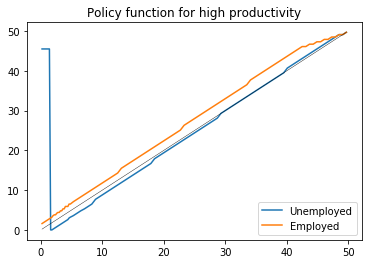

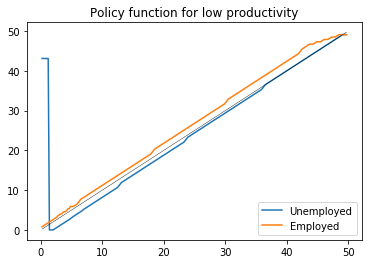

In [4]:
#Plot the policy functions for K=4
plt.plot(k[1:100],g0g[1:100,4], label='Unemployed')
plt.plot(k[1:100],g1g[1:100,4], label='Employed')
plt.plot(k[1:100],k[1:100], 'k', linewidth=0.4)
plt.legend()
plt.title('Policy function for high productivity')
plt.show()

plt.plot(k[1:100],g0b[1:100,4], label='Unemployed')
plt.plot(k[1:100],g1b[1:100,4], label='Employed')
plt.plot(k[1:100],k[1:100], 'k', linewidth=0.4)
plt.title('Policy function for low productivity')
plt.legend()
plt.show()

We have a problem in the policy function for the poor & unemployed guys. When we change $\Gamma$, that is, the scale of the disutility of labor, the policies changes a lot, until the point that unemployed guys end with 0 assets no matter the previous level of assets. Maybe it's a parameter problem. Economically, it looks like feasibility is not applying for unemployed poorest guys. We have to fix it... 
Also, we've to check for aggregate consistency. Plus, we have to recover the stationary aggregate capital. 


<h3>Question 2.1: Simulation of the model with aggregate shocks</h3>

In [242]:
np.random.seed( 10 )
random.seed(10)
#State space
k0=np.arange(0,5,0.2)
k1=np.arange(5.3,50,0.6)
k=np.concatenate((k0,k1))
K=np.arange(16,18.5,0.5)

#Simulate a history of aggregate and idiosyncratic shocks
zt=np.random.choice([0.95,1.05],size=1000,p=[0.5,0.5])
E=np.empty((500,1000))
for i in range(500):
    E[i,:]=np.random.choice([0,1],size=1000,p=[0.5,0.5])

def H(Z,i):
    """It takes a specific value of aggregate capital 
    and productivity shock and returns the 
    next period aggregate capital."""
    b0g=0.1839
    b1g=0.9375
    b0b=0.3217
    b1b=0.8855
    return np.exp((b0g+b1g*np.log(Z))*i + ((b0b+b1b*np.log(Z))*(1-i)))

#Initial level of assets for each individual. 
Assets=np.ones((500,100))
Assets[:,0]=np.ones((500))*0.4
Kapital=np.empty((100))
Kapital[0]=0.4
for t,i in it.product(range(100),range(500)):
    a=np.argmin(abs(k - Assets[i,t]))
    j=np.argmin(abs(K - Kapital[t]))
    if E[i,t]==0 and zt[t]==0:
        Assets[i,t+1]=g0b[a,j]
        Kapital[t+1]=(np.sum(Assets[:,t+1]))/500
    if E[i,t]==1 and zt[t]==0:
        Assets[i,t+1]=g1b[a,j]
        Kapital[t+1]=(np.sum(Assets[:,t+1]))/500
    if E[i,t]==0 and zt[t]==1:
        Assets[i,t+1]=g0g[a,j]
        Kapital[t+1]=(np.sum(Assets[:,t+1]))/500
    if E[i,t]==1 and zt[t]==1:
        Assets[i,t+1]=g1g[a,j]        
        Kapital[t+1]=(np.sum(Assets[:,t+1]))/500

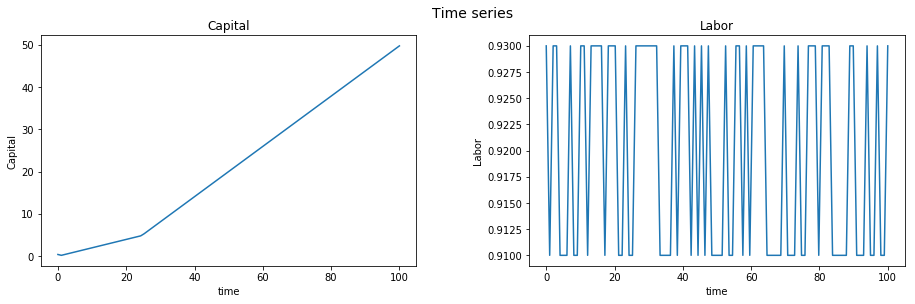

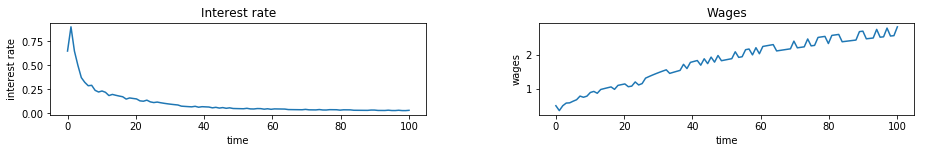

In [266]:
#Time series
L=[0.91,0.93]
Labor=np.empty((100))
for t in range(100):
    if zt[t]==0.95:
        Labor[t]=L[0]
    else:
        Labor[t]=L[1]
        

α=0.36
wages=np.ones((100))
interest=np.empty((100))
for v in range(100):
    wages[v]=(1-α)*zt[v]*pow((Kapital[v]/Labor[v]),α)
    interest[v]=α*zt[v]*pow((Labor[v]/Kapital[v]),(1-α))

#Plot everything
plt.figure(1)
plt.suptitle('Time series', x=1, y=1, fontsize=14)

plt.subplot(121)
plt.plot(time,Kapital)
plt.xlabel('time')
plt.ylabel('Capital')
plt.title('Capital')

plt.subplot(122)
plt.plot(time,Labor)
plt.xlabel('time')
plt.ylabel('Labor')
plt.title('Labor')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
plt.show()

plt.figure(2)
plt.subplot(221)
plt.plot(time,interest)
plt.xlabel('time')
plt.ylabel('interest rate')
plt.title('Interest rate')

plt.subplot(222)
plt.plot(time, wages)
plt.xlabel('time')
plt.ylabel('wages')
plt.title('Wages')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.show()

By simulating our model for 100 periods for 500 agents we got these time series. The results are very much in line with neoclassic growth theory: 
- The aggregate capital stock increases over time. 
- The rate of return decreases because of marginal decreasing productivity of the capital. Then, the wage rate increases. 
- In this simple version we only have two levels of employment, so the economy keeps swithching between them mimicing the pattern of productivity shocks. 